# Handy ML tools and functions / Working with data in Python

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'Province/Territory': 
        ['Nunavut', 'Alberta', 'Saskatchewan', 
        'Yukon', 'Manitoba', 'British Columbia', 
        'Ontario', 'Quebec', 'Prince Edward Island',
        'Newfoundland and Labrador', 
        'Northwest Territories', 'Nova Scotia', 
        'New Brunswick'],
    'Land (km^2)': 
        [1877787, 640081, 591670, 474391, 548360,
        925186, 917741, 1365128, 5660, 
        373872, 1183085, 52942, 71450],
    'Population': 
        [35944, 4067175, 1098352, 35874, 1278365, 
        4648055, 13448494, 8164361, 142907,
        519716, 41786, 923598, 747101],
    'Unemployment rate (%)':
        [14.1, 6.6, 6.1, 2.7, 6, 4.7, 5.6, 5.5,
        9.4, 13.8, 7.3, 7.5, 8],
    'GDP (million, CAD)': 
        [2846, 331937, 79513, 2895, 71019,
        282204, 825805, 417173, 6652,
        33074, 4856, 42715, 36088]
}

# Instantiate a new DataFrame with the above dict
canada_df = pd.DataFrame(data)

# Pick the columns we want from the original dict, and indicate the desired order.
# This is necessary for versions of Python before 3.6, which did not maintain an order in the dict type.
canada_df = canada_df[['Province/Territory', 'Land (km^2)', 'Population', 'Unemployment rate (%)', 'GDP (million, CAD)']]

canada_df

,Province/Territory,Land (km^2),Population,Unemployment rate (%),"GDP (million, CAD)"
0,Nunavut,1877787,35944,14.1,2846
1,Alberta,640081,4067175,6.6,331937
2,Saskatchewan,591670,1098352,6.1,79513
3,Yukon,474391,35874,2.7,2895
4,Manitoba,548360,1278365,6.0,71019
5,British Columbia,925186,4648055,4.7,282204
6,Ontario,917741,13448494,5.6,825805
7,Quebec,1365128,8164361,5.5,417173
8,Prince Edward Island,5660,142907,9.4,6652
9,Newfoundland and Labrador,373872,519716,13.8,33074


## Count instances that pass a condition

In [13]:
# I'm defining "high unemployment" arbitrarily as over 7%
high_unemployment_series = canada_df['Unemployment rate (%)'] > 7
# Another method follows, if a more complex decision function is required:
#high_unemployment_series = canada_df.apply(lambda x: True if x['Unemployment rate (%)'] > 7 else False, axis=1)

high_unemployment_count = len(high_unemployment_series[high_unemployment_series == True].index)
low_unemployment_count = len(high_unemployment_series[high_unemployment_series == False].index)

print("Number of provinces/territories with high unemployment: ", high_unemployment_count)
print("Number of provinces/territories with low unemployment: ", low_unemployment_count)

Number of provinces/territories with high unemployment:  6
Number of provinces/territories with low unemployment:  7


## Add a class feature representing relative size of GDP

In [14]:
# First, assign a class based on GDP (small: 1, medium: 2, large: 3) to enable visual differentiation 
# between the difference sizes of GDP
def classify_gdp(row):
    gdp = row['GDP (million, CAD)']
    if gdp < 10000:
        val = 1
    elif gdp >= 10000 and gdp < 100000:
        val = 2
    else:
        val = 3
    return val

canada_df['GDP size label'] = canada_df.apply(classify_gdp, axis=1)
canada_df


,Province/Territory,Land (km^2),Population,Unemployment rate (%),"GDP (million, CAD)",GDP size label
0,Nunavut,1877787,35944,14.1,2846,1
1,Alberta,640081,4067175,6.6,331937,3
2,Saskatchewan,591670,1098352,6.1,79513,2
3,Yukon,474391,35874,2.7,2895,1
4,Manitoba,548360,1278365,6.0,71019,2
5,British Columbia,925186,4648055,4.7,282204,3
6,Ontario,917741,13448494,5.6,825805,3
7,Quebec,1365128,8164361,5.5,417173,3
8,Prince Edward Island,5660,142907,9.4,6652,1
9,Newfoundland and Labrador,373872,519716,13.8,33074,2


## Compare numeric features with `GDP size label` as the target

<IPython.core.display.Javascript object>


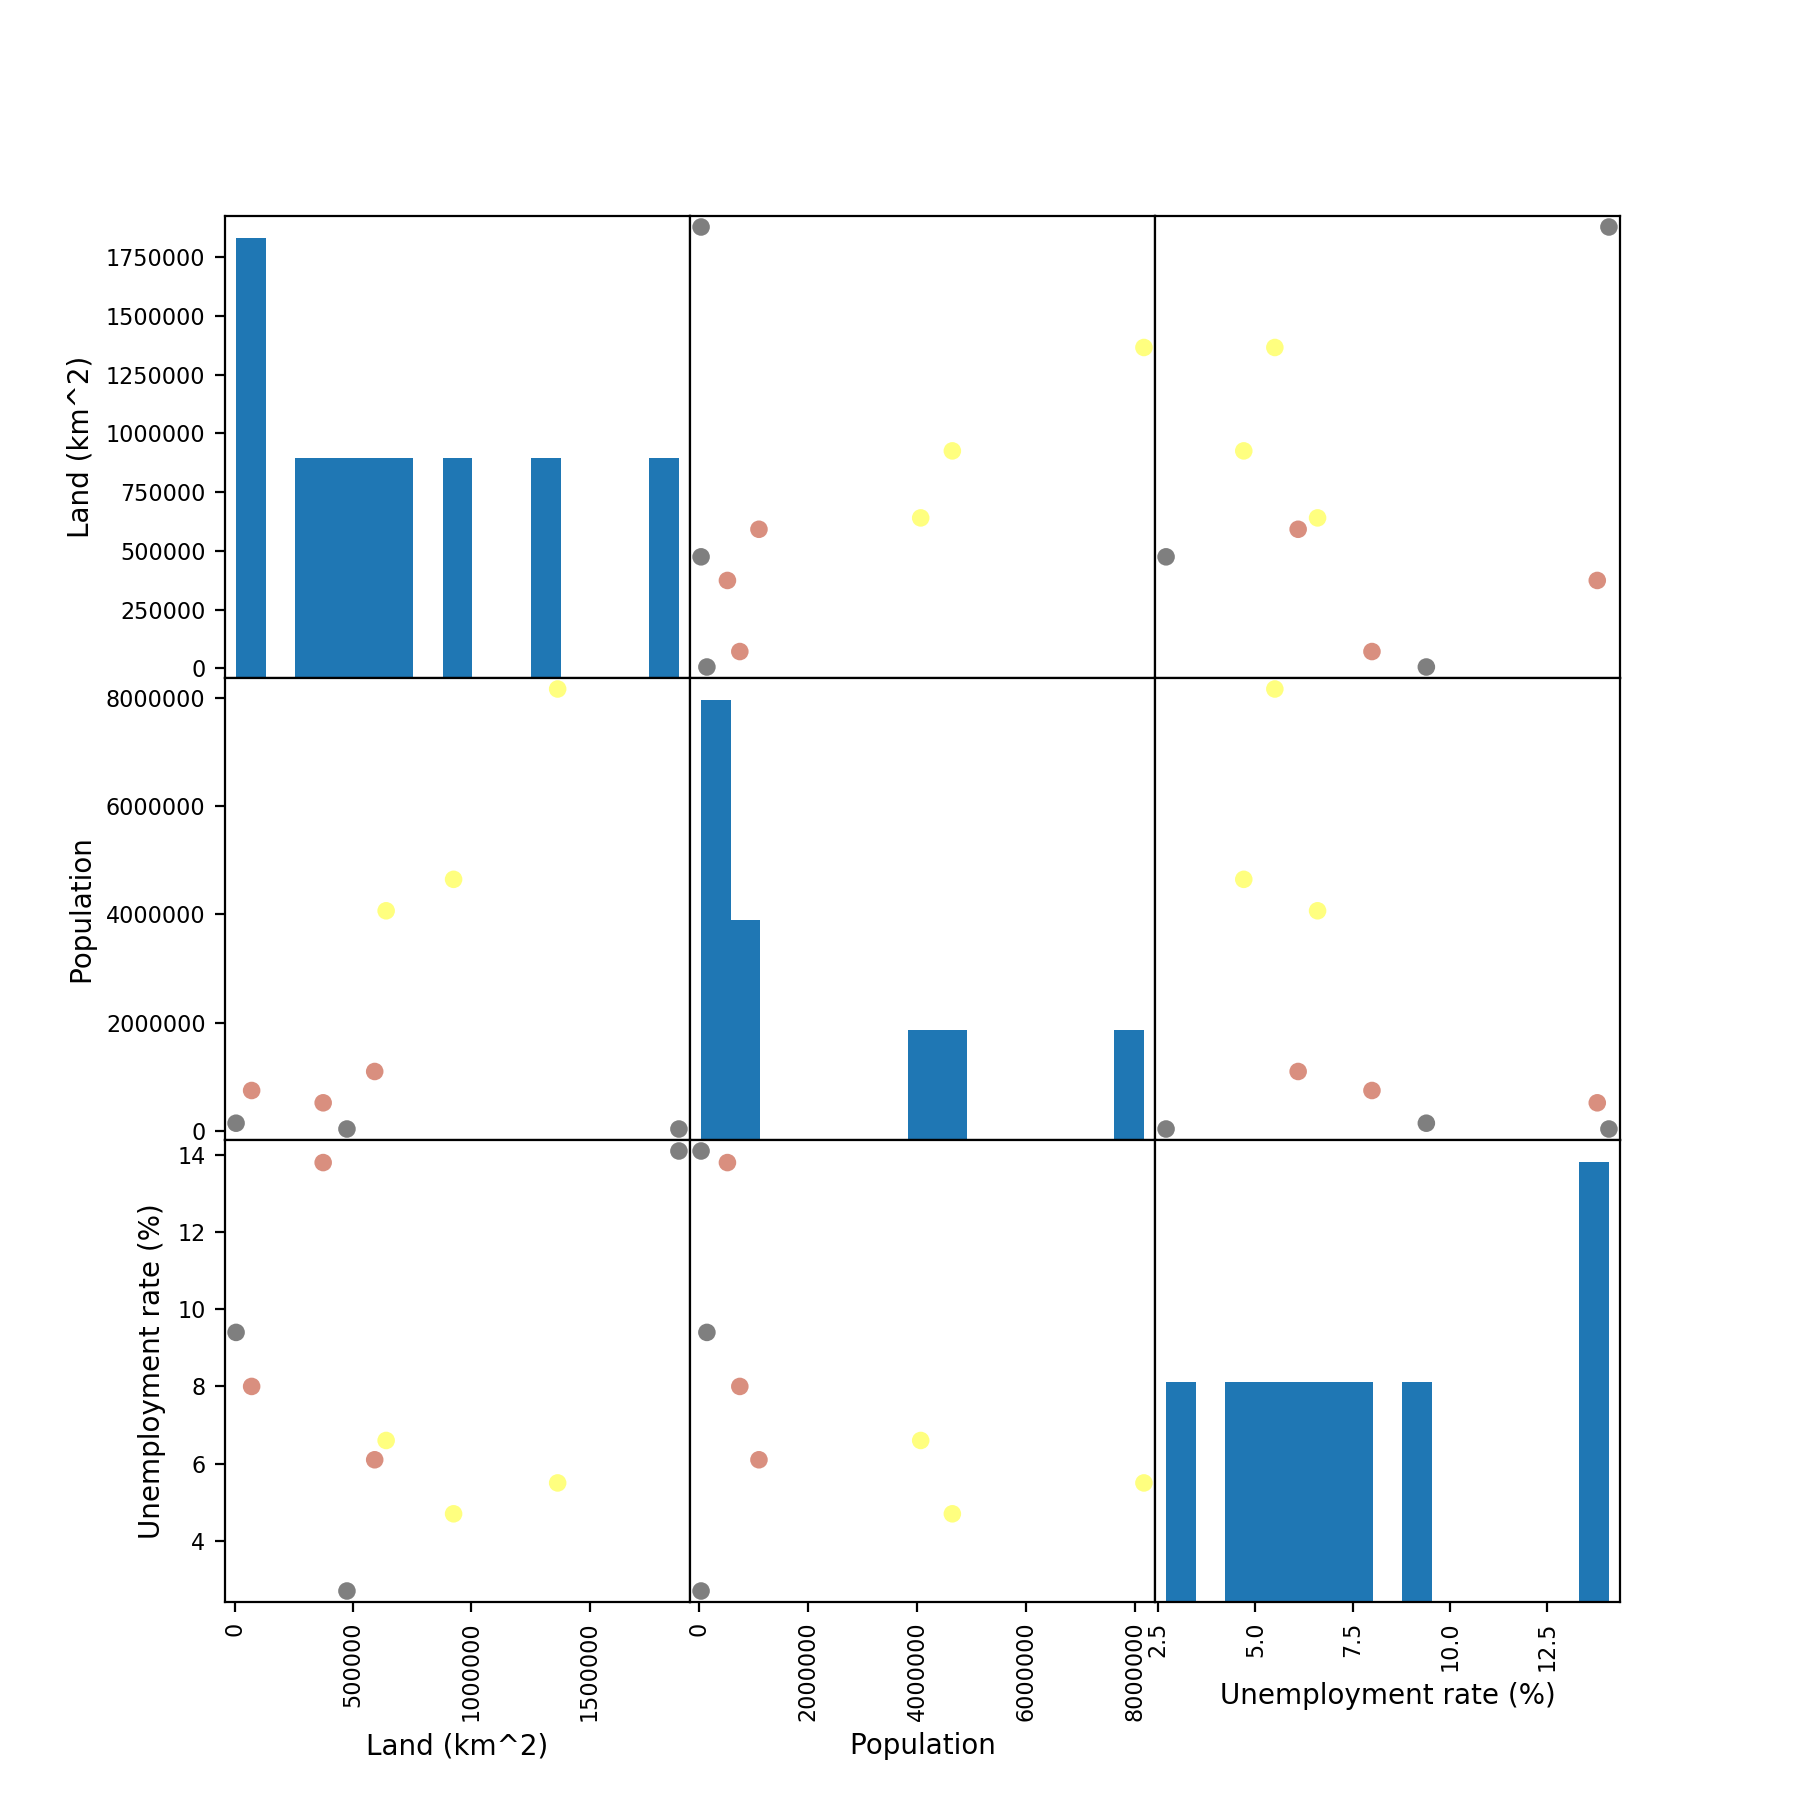

In [15]:
from matplotlib import cm
%matplotlib notebook

# First, separate training from test data
# Select only numeric features that we're interested in plotting.
# Inlcuding 'GDP (million, CAD)' wouldn't make sense here, since it would leak data about the target!
X = canada_df[['Land (km^2)', 'Population', 'Unemployment rate (%)']]

# This column of labels will be our target y values
y = canada_df['GDP size label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot the training values!
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s = 40, hist_kwds = {'bins':15}, figsize = (9,9), cmap = cmap)

## Comparing models for Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Question: can we predict the GDP of a provice based on it's land, population, and unemployment rate?

# We've done a train test split for CLASSIFICATION above, need a new split with y values that are the actual
# GDP value for regression.

y_regression = canada_df['GDP (million, CAD)']

# overwrite the existing train/test/split variables
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, random_state=1)

#### Linear regression

In [6]:
linreg = LinearRegression().fit(X_train, y_train)

print('LinearRegression R^2 score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('LinearRegression R^2 score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

LinearRegression R^2 score (training): 0.979
LinearRegression R^2 score (test): 0.914


#### Ridge regression

In [7]:
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Ridge Regression R^2 score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('Ridge Regression R^2 score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

Ridge Regression R^2 score (training): 0.979
Ridge Regression R^2 score (test): 0.932


#### Ridge regression with normalization

In [8]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

linridge_normalized = Ridge(alpha=0.01).fit(X_train_normalized, y_train)

print('Ridge Regression, normalized R^2 score (training): {:.3f}'
     .format(linridge_normalized.score(X_train_normalized, y_train)))
print('Ridge Regression, normalized R^2 score (test): {:.3f}'
     .format(linridge_normalized.score(X_test_normalized, y_test)))


Ridge Regression, normalized R^2 score (training): 0.978
Ridge Regression, normalized R^2 score (test): 0.954


#### Polynomial Regression

In [9]:
# Transform the data to add polynomial features to degree 2
X_poly = PolynomialFeatures(degree=2).fit_transform(X)

# Note the additional columns that were added by the PolynomialFeatures fit_transform
print("Shape of X before:", X.shape, "and after:", X_poly.shape)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_regression, random_state=1)

linreg_poly = LinearRegression().fit(X_train_poly, y_train_poly)

print('Polynomial Regression (training): {:.3f}'
     .format(linreg_poly.score(X_train_poly, y_train_poly)))
print('Polynomial Regression (test): {:.3f}'
     .format(linreg_poly.score(X_test_poly, y_test_poly)))

# YIKES: overfitted!!

Shape of X before: (13, 3) and after: (13, 10)
Polynomial Regression (training): 1.000
Polynomial Regression (test): -130.798


#### Decision Tree

In [10]:
import operator
decision_tree = DecisionTreeRegressor(random_state=0, max_depth=3).fit(X_train, y_train)

print('Decision Tree Regressor R^2 score (training): {:.3f}'
     .format(decision_tree.score(X_train, y_train)))
print('Decision Tree Regressor R^2 score (test): {:.3f}'
     .format(decision_tree.score(X_test, y_test)))

# Find the "most important" features from the tree's perspective
importance_dict = dict(zip(X_train.columns, decision_tree.feature_importances_))
# SORT DICTIONARY by value into a list of tuples: 
sorted_importance = sorted(importance_dict.items(), key=operator.itemgetter(1), reverse=True)

print("Important features:", sorted_importance)

Decision Tree Regressor R^2 score (training): 0.998
Decision Tree Regressor R^2 score (test): 0.577
Important features: [('Population', 0.9868237285875826), ('Land (km^2)', 0.013176271412417347), ('Unemployment rate (%)', 0.0)]


## Reshaping numpy arrays

In [11]:
# Extract GDP as a numpy array
gdp_values = canada_df['GDP (million, CAD)'].values

print("GDP values:", gdp_values)

# Now convert to a 2d array with reshape.
# .reshape: "One shape dimension can be -1. In this case, the value is inferred from the length of the array  
# and remaining dimensions"
gdp_values_2d = gdp_values.reshape(-1, 1)

print("GDP values, 2d:", gdp_values_2d)

GDP values: [  2846 331937  79513   2895  71019 282204 825805 417173   6652  33074
   4856  42715  36088]
GDP values, 2d: [[  2846]
 [331937]
 [ 79513]
 [  2895]
 [ 71019]
 [282204]
 [825805]
 [417173]
 [  6652]
 [ 33074]
 [  4856]
 [ 42715]
 [ 36088]]


## Joining DataFrames on a common column

In [12]:
# Let's say we wanted to join the canada_df dataframe with another that included 
# data about the amount of water in each province & territory.

# Note how the data is in a different order than that of the canada_df.

water_data = {
    'Province/Territory': 
        ['Ontario', 'Quebec', 'Nova Scotia', 'Manitoba', 'New Brunswick',
         'British Columbia', 'Prince Edward Island', 'Saskatchewan', 'Alberta',
         'Newfoundland and Labrador', 'Northwest Territories', 'Yukon', 'Nunavut'
        ],
    'Water (km^2)': 
        [158654, 185928, 1946, 94241, 1458, 19549, 0, 59366, 19531, 31340, 
         163021, 8052, 157077
        ]
}


# Instantiate a new DataFrame with the above dict
water_df = pd.DataFrame(water_data)

# Join water_df with canada_df, on the 'Province/Territory' column, use a left join
merged_df = pd.merge(left=canada_df, right=water_df, how='left', left_on='Province/Territory', right_on='Province/Territory')
merged_df

,Province/Territory,Land (km^2),Population,Unemployment rate (%),"GDP (million, CAD)",GDP size label,Water (km^2)
0,Nunavut,1877787,35944,14.1,2846,1,157077
1,Alberta,640081,4067175,6.6,331937,3,19531
2,Saskatchewan,591670,1098352,6.1,79513,2,59366
3,Yukon,474391,35874,2.7,2895,1,8052
4,Manitoba,548360,1278365,6.0,71019,2,94241
5,British Columbia,925186,4648055,4.7,282204,3,19549
6,Ontario,917741,13448494,5.6,825805,3,158654
7,Quebec,1365128,8164361,5.5,417173,3,185928
8,Prince Edward Island,5660,142907,9.4,6652,1,0
9,Newfoundland and Labrador,373872,519716,13.8,33074,2,31340
